<a href="https://colab.research.google.com/github/pranjal272/Practice/blob/main/hdsc_fuel_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url='https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv'
data=pd.read_csv(url)

displays all columns

In [ ]:
pd.set_option('display.max_columns', None)
data.tail()

In [ ]:
data.describe(include='all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_2010_12_42_3_4,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [ ]:
data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [ ]:
data.groupby('fuel_unit').first()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_unit,,,,,,,,,,
bbl,f1_fuel_1994_12_6_0_2,6,1994,clinch river,oil,6510.0,5.875338,32.130,23.444,5.469
gal,f1_fuel_2000_12_20_0_10,20,2000,hallock,oil,56925.0,5.527200,1.095,1.096,8.324
gramsU,f1_fuel_1994_12_9_0_8,9,1994,pch bt 2&3,nuclear,204246.0,0.000065,44.000,0.000,0.679
kgU,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,nuclear,2260.0,0.064094,28.770,0.000,0.450
mcf,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,40533.0,1.000000,2.770,2.770,2.570
mmbtu,f1_fuel_1994_12_46_1_7,46,1994,perry #1,nuclear,6619313.0,0.110455,1.170,0.000,1.170
mwdth,f1_fuel_1994_12_17_2_14,17,1994,h. b. robinson,nuclear,632744.0,3.413000,38.960,0.000,0.476
mwhth,f1_fuel_1994_12_63_0_2,63,1994,river bend unit 1,nuclear,10748582.0,3.412600,3.801,0.000,1.114
ton,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,5377489.0,16.590000,18.590,18.530,1.121


first val of every col in that group

In [ ]:
data.groupby('fuel_unit')['fuel_unit'].count()

fuel_unit
bbl        7998
gal          84
gramsU      464
kgU         110
mcf       11534
mmbtu       180
mwdth        95
mwhth       100
ton        8958
Name: fuel_unit, dtype: int64

**data.groupby('fuel_unit')** ['fuel_unit'] - display only fuel_unit col

In [ ]:
data.groupby('fuel_unit').count()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_unit,,,,,,,,,,
bbl,7998,7998,7998,7998,7998,7998,7998,7998,7998,7998
gal,84,84,84,84,84,84,84,84,84,84
gramsU,464,464,464,464,464,464,464,464,464,464
kgU,110,110,110,110,110,110,110,110,110,110
mcf,11534,11534,11534,11534,11534,11534,11534,11534,11534,11534
mmbtu,180,180,180,180,180,180,180,180,180,180
mwdth,95,95,95,95,95,95,95,95,95,95
mwhth,100,100,100,100,100,100,100,100,100,100
ton,8958,8958,8958,8958,8958,8958,8958,8958,8958,8958


This was done to see which value has maximum number of count i.e it appears frequently and we can see mcf has 11354 most number of values

In [ ]:
data['fuel_unit'].fillna(value='mcf')

This fills data for that time only

In [ ]:
data.isnull().sum()

This will still display same null values as it were at the start thus, we write it as **data['fuel_unit']** = data['fuel_unit'].fillna(value='mcf')

In [ ]:
data['fuel_unit']=data['fuel_unit'].fillna(value='mcf')

In [ ]:
data.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

reset index(drop): resets index to default integer index


In [ ]:
df1=data.iloc[0:19000].reset_index(drop=True)
df2=data.iloc[19000:].reset_index(drop=True)

assert continues to run program when true if false gives assertion error

In [ ]:
assert len(data) == len(df1) + len(df2)


In [ ]:
df2.head(5)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_2009_12_79_0_2,79,2009,montrose,oil,bbl,22912.0,5.770422,65.443,67.540,11.341
1,f1_fuel_2009_12_79_0_4,79,2009,hawthorn 5,coal,ton,2408123.0,16.782000,18.598,18.310,1.108
2,f1_fuel_2009_12_79_0_5,79,2009,hawthorn 5,gas,mcf,82141.0,1.000000,6.238,6.238,6.238
3,f1_fuel_2009_12_79_0_7,79,2009,hawthorn 6 & 9,gas,mcf,1701680.0,1.000000,4.885,4.885,4.885
4,f1_fuel_2009_12_79_0_10,79,2009,hawthorn 7 & 8,gas,mcf,82601.0,1.000000,5.383,5.383,5.383


In [ ]:
res=pd.merge(df1,df2,how="right")
res.head(5)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_2009_12_79_0_2,79,2009,montrose,oil,bbl,22912.0,5.770422,65.443,67.540,11.341
1,f1_fuel_2009_12_79_0_4,79,2009,hawthorn 5,coal,ton,2408123.0,16.782000,18.598,18.310,1.108
2,f1_fuel_2009_12_79_0_5,79,2009,hawthorn 5,gas,mcf,82141.0,1.000000,6.238,6.238,6.238
3,f1_fuel_2009_12_79_0_7,79,2009,hawthorn 6 & 9,gas,mcf,1701680.0,1.000000,4.885,4.885,4.885
4,f1_fuel_2009_12_79_0_10,79,2009,hawthorn 7 & 8,gas,mcf,82601.0,1.000000,5.383,5.383,5.383


In [ ]:
data.duplicated().any()

False

duplicated(subset,keep)

**subset** : column acc to which duplicated values are to be found

**keep**: 

*   **first(default)** - first value is considered unique and all other similar values are considered.
*   **last**- last value is considered as unique and rest as duplicates

*  **false**- all similar values are considered as duplicates













concatenation

In [ ]:
pd.concat([fuel_data, data_to_concat]).reset_index(drop=True)

Text(0.5, 0, 'Fuel Unit')

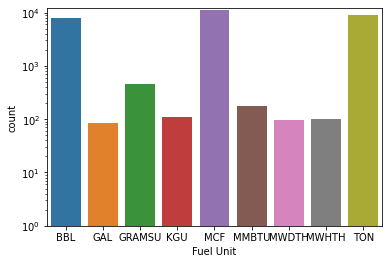

In [4]:
fuel_unit = pd.DataFrame({'unit':['BBL', 'GAL', 'GRAMSU', 'KGU', 'MCF', 'MMBTU',
'MWDTH', 'MWHTH', 'TON'],
'count':[7998, 84, 464, 110, 11354, 180, 95, 100, 8958]})

g = sns.barplot(data=fuel_unit, x='unit', y='count')
g.set_yscale("log")
g.set_ylim(1, 12000)
plt.xlabel('Fuel Unit')